Consider the COVID-19 dataset for India given in the following link. https://www.kaggle.com/sudalairajkumar/covid19-in-india

# Note:
The question is done as single variable clustering

Models Used:


1.   K-Means clustering
2.   Agglometric Hierarchial clustering



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df=pd.read_csv("/content/covid_19_india.csv")
df1=pd.read_csv("/content/StatewiseTestingDetails.csv")
df1.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       7086 non-null   int64 
 1   Date                      7086 non-null   object
 2   Time                      7086 non-null   object
 3   State/UnionTerritory      7086 non-null   object
 4   ConfirmedIndianNational   7086 non-null   object
 5   ConfirmedForeignNational  7086 non-null   object
 6   Cured                     7086 non-null   int64 
 7   Deaths                    7086 non-null   int64 
 8   Confirmed                 7086 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 498.4+ KB


In [4]:
le = LabelEncoder()
y=df['State/UnionTerritory']
le.fit_transform(df['State/UnionTerritory'])
y = le.transform(y)
y

array([19, 19, 19, ..., 40, 39, 41])

Label Encoding and finding length to determine the number of clusters


In [5]:
l=[]
for i in y:
  l.append(i)
print(set(l))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}


# 1) active cases

In [6]:
d1=np.array(df["Confirmed"])
r=range(len(d1))
data1 = np.column_stack([r,d1])
data1

array([[     0,      1],
       [     1,      1],
       [     2,      2],
       ...,
       [  7083,  52329],
       [  7084, 420937],
       [  7085, 277049]])

In [7]:
kmeans = KMeans(n_clusters=42)
kmeans.fit(data1[:,1].reshape(-1,1))
y_kmeans = kmeans.predict(data1[:,1].reshape(-1,1))
print(y_kmeans)
av = AgglomerativeClustering( n_clusters=42,linkage = "average",affinity='euclidean')
av.fit(data1[:,1].reshape(-1,1))
t=av.fit_predict(data1[:,1].reshape(-1,1))
print(t)

[19 19 19 ...  8 31 29]
[ 3  3  3 ... 11 38  5]


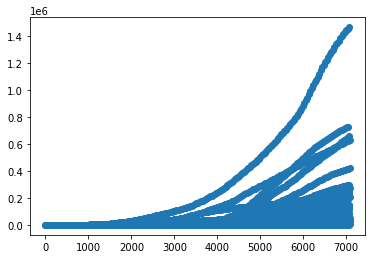

In [8]:
plt.scatter(data1[:,0],data1[:,1])

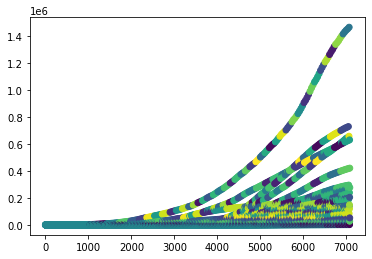

In [9]:
plt.scatter(data1[:,0],data1[:,1],c=y_kmeans)

PERFORMANCE ANALYSIS

In [10]:
print("Kmeans: ",metrics.adjusted_rand_score(y, y_kmeans))
print("Hierarchial: ",metrics.adjusted_rand_score(y, t))

Kmeans:  0.008734447588982243
Hierarchial:  0.0026945044211383047


# 2.death rate

In [11]:
v1=df['Deaths']
v2=df['Confirmed']
lst=[]
for i in range(len(v1)):
  if v2[i]!=0:
    lst.append(v1[i]/v2[i])
  else:
    lst.append(0)
len(lst)

7086

In [12]:
df['drate']=lst

In [13]:
d1=np.array(df["drate"])
r=range(len(d1))
data2 = np.column_stack([r,d1])
data2

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00],
       ...,
       [7.08300000e+03, 1.29373770e-02],
       [7.08400000e+03, 1.46173893e-02],
       [7.08500000e+03, 1.91951604e-02]])

In [14]:
kmeans = KMeans(n_clusters=42)
kmeans.fit(data2[:,1].reshape(-1,1))
y_kmeans = kmeans.predict(data2[:,1].reshape(-1,1))
print(y_kmeans)
av = AgglomerativeClustering( n_clusters=42,linkage = "average",affinity='euclidean')
av.fit(data2[:,1].reshape(-1,1))
t=av.fit_predict(data2[:,1].reshape(-1,1))
print(t)

[ 1  1  1 ... 16 38 39]
[24 24 24 ...  6  6 32]


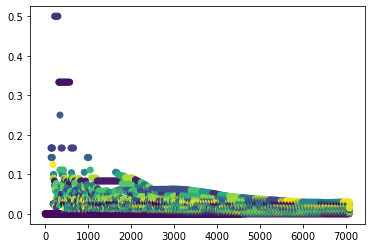

In [15]:
plt.scatter(data2[:,0],data2[:,1],c=y_kmeans)

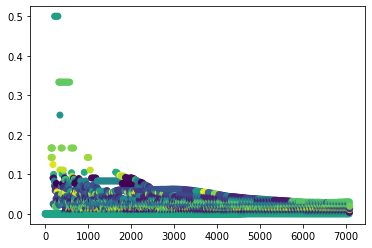

In [16]:
plt.scatter(data2[:,0],data2[:,1],c=t)

PERFORMANCE ANALYSIS

In [17]:
print("Kmeans: ",metrics.adjusted_rand_score(y, y_kmeans))
print("Hierarchial: ",metrics.adjusted_rand_score(y, t))

Kmeans:  0.06819788532859561
Hierarchial:  0.06248011488099326


# 3.testing-confirm cases ratio

In [18]:
df1['Positive']=df1['Positive'].fillna(0)
le = LabelEncoder()
y=df1['State']
le.fit_transform(df1['State'])
y = le.transform(y)
y

array([ 0,  0,  0, ..., 34, 34, 34])

In [19]:
l=[]
for i in y:
  l.append(i)
print(set(l))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}


In [20]:
df2=df1.drop(columns=["Negative"])
df2.fillna(0)
l=[]
for i in df2['Positive']/df2['TotalSamples']:
  l.append(i)
df2["ratio"]=l
df2.head()

,Date,State,TotalSamples,Positive,ratio
0,2020-04-17,Andaman and Nicobar Islands,1403.0,12.0,0.008553
1,2020-04-24,Andaman and Nicobar Islands,2679.0,27.0,0.010078
2,2020-04-27,Andaman and Nicobar Islands,2848.0,33.0,0.011587
3,2020-05-01,Andaman and Nicobar Islands,3754.0,33.0,0.008791
4,2020-05-16,Andaman and Nicobar Islands,6677.0,33.0,0.004942


In [21]:
for j in df2.columns:
  if(df2[j].dtype=="object"):
    x=df2[j].unique()
    d={}
    for i in range(len(x)):
      d[x[i]]=i
    df2=df2.replace({j:d})
df2=df2[['State','Date','ratio']]
df2.head()


,State,Date,ratio
0,0,0,0.008553
1,0,1,0.010078
2,0,2,0.011587
3,0,3,0.008791
4,0,4,0.004942


In [22]:
print(len(df2['State'].unique()))

35


In [23]:
x=np.array(df2.iloc[:,1:len(df.columns)])
y=np.array(df2.iloc[:,0:1])
y

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [34],
       [34],
       [34]])

In [24]:
kmeans = KMeans(n_clusters=35)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
print(y_kmeans)
av = AgglomerativeClustering( n_clusters=35,linkage = "average",affinity='euclidean')
av.fit(x)
t=av.fit_predict(x)
print(t)

[ 0  0  0 ... 20 20 25]
[28 28 28 ...  8  8  4]


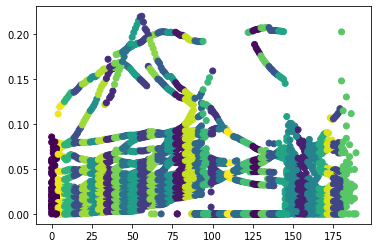

In [25]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans)

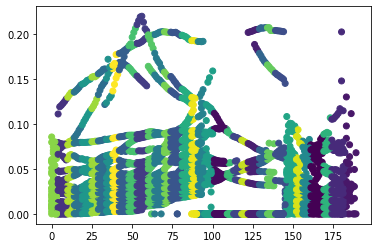

In [26]:
plt.scatter(x[:,0],x[:,1],c=t)

In [27]:
l=[]
for i in y:
  l.append(i[0])

PERFORMANCE ANALYSIS

In [28]:
print("Kmeans: ",abs(metrics.adjusted_rand_score(l, y_kmeans)))
print("Hierarchial: ",abs(metrics.adjusted_rand_score(l, t)))

Kmeans:  0.004760575718309467
Hierarchial:  0.004614226758229679


# 4.Recovery rate

In [29]:
v1=df['Cured']
v2=df['Confirmed']
lst=[]
for i in range(len(v1)):
  if v2[i]!=0:
    lst.append(v1[i]/v2[i])
  else:
    lst.append(0)
len(lst)

7086

In [30]:
df['rrate']=lst

In [31]:
d1=np.array(df["rrate"])
r=range(len(d1))
data4 = np.column_stack([r,d1])
data4

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 0.00000000e+00],
       ...,
       [7.08300000e+03, 8.26272239e-01],
       [7.08400000e+03, 8.80780259e-01],
       [7.08500000e+03, 8.79782999e-01]])

In [32]:
le = LabelEncoder()
y=df['State/UnionTerritory']
le.fit_transform(df['State/UnionTerritory'])
y = le.transform(y)
y

array([19, 19, 19, ..., 40, 39, 41])

In [33]:
kmeans = KMeans(n_clusters=42)
kmeans.fit(data4[:,1].reshape(-1,1))
y_kmeans = kmeans.predict(data4[:,1].reshape(-1,1))
y_kmeans
av = AgglomerativeClustering( n_clusters=42,linkage = "average",affinity='euclidean')
av.fit(data4[:,1].reshape(-1,1))
t=av.fit_predict(data4[:,1].reshape(-1,1))
t

array([22, 22, 22, ..., 27, 15, 15])

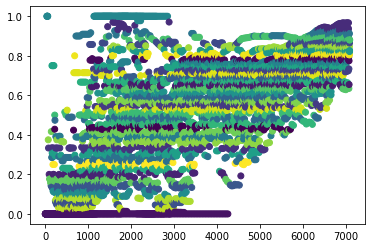

In [34]:
plt.scatter(data4[:,0],data4[:,1],c=y_kmeans)

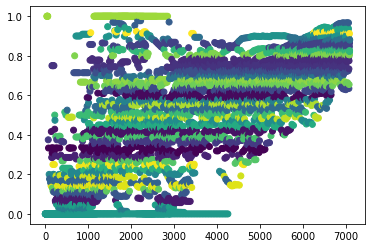

In [35]:
plt.scatter(data4[:,0],data4[:,1],c=t)

PERFORMANCE ANALYSIS

In [36]:
print("Kmeans: ",metrics.adjusted_rand_score(y, y_kmeans))
print("Hierarchial: ",metrics.adjusted_rand_score(y, t))

Kmeans:  0.02011018692228637
Hierarchial:  0.02098660235672824
